In [1]:
# importing libraries

import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from datetime import datetime as dt
import matplotlib

In [2]:
# importing dataset

df = pd.read_csv('new_york_data.csv', index_col = 0)

In [3]:
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'date', 'avgTemp', '_merge'],
      dtype='object')

In [4]:
# dropping unneeded merge column

df.drop(columns = {'_merge'}, inplace = True)

In [5]:
# checking dataframe data types

df.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
date                   object
avgTemp               float64
dtype: object

In [6]:
# changing date to datetime

df['date'] = pd.to_datetime(df['date'])

### Plotting with Python

In [7]:
df_temp = df.set_index('date')

In [8]:
df_temp.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,avgTemp
date,,,,,,,,,,,,,,
2022-01-01,11AA3AB3ED9FEFC5,classic_bike,2022-01-01 00:10:20,2022-01-01 00:19:29,Riverview Park,JC057,Riverview Park,JC057,40.744319,-74.043991,40.744319,-74.043991,casual,11.6
2022-01-01,554FD61E00599BE2,electric_bike,2022-01-01 00:10:24,2022-01-01 00:14:06,Sip Ave,JC056,Glenwood Ave,JC094,40.730897,-74.063913,40.727551,-74.071061,member,11.6
2022-01-01,4D3D324F756B7103,electric_bike,2022-01-01 00:10:28,2022-01-01 00:14:12,Sip Ave,JC056,Glenwood Ave,JC094,40.730897,-74.063913,40.727551,-74.071061,member,11.6
2022-01-01,E26BB19DBC834216,classic_bike,2022-01-01 00:10:30,2022-01-01 00:24:30,Grove St PATH,JC005,Newport Pkwy,JC008,40.719586,-74.043117,40.728745,-74.032108,member,11.6
2022-01-01,DC18B042AA415411,classic_bike,2022-01-01 00:11:31,2022-01-01 00:30:43,Columbus Dr at Exchange Pl,JC106,Columbus Dr at Exchange Pl,JC106,40.716870,-74.032810,40.716870,-74.032810,casual,11.6


<Axes: xlabel='date'>

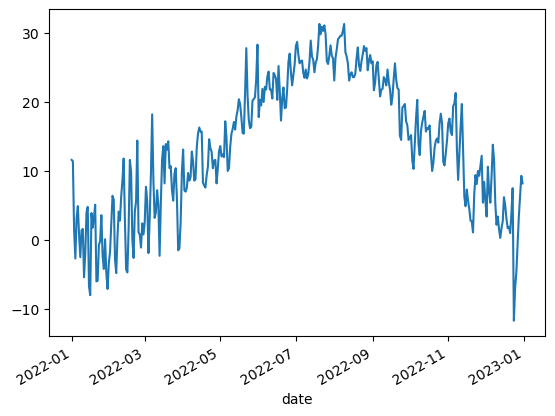

In [15]:
# creating line chart with pandas

df_temp['avgTemp'].plot()

In [10]:
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'date', 'avgTemp'],
      dtype='object')

In [11]:
# Groupby the count of the trips 

df_group = pd.DataFrame(df.groupby(['date'])['ride_id'].count()).reset_index()

In [12]:
df_group.head()

,date,ride_id
0,2022-01-01,592
1,2022-01-02,1248
2,2022-01-03,832
3,2022-01-04,934
4,2022-01-05,914


In [13]:
# merging the daily rides column into the main dataframe

df_group.rename(columns = {'ride_id':'bike_rides_daily'}, inplace = True)
df = df.merge(df_group, on = "date", how = 'outer', indicator = True)
print(df['_merge'].value_counts(dropna = False))
print("Shape of January 1st is", df[df['date'] == '2018-01-01'].shape) # Check 
print("Shape of January 2nd is", df[df['date'] == '2018-01-02'].shape) # Second check 

df_temp = df.set_index('date')

print(df_temp.columns)

_merge
both          895485
left_only          0
right_only         0
Name: count, dtype: int64
Shape of January 1st is (0, 17)
Shape of January 2nd is (0, 17)
Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'avgTemp', 'bike_rides_daily', '_merge'],
      dtype='object')


In [14]:
df_temp.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,avgTemp,bike_rides_daily,_merge
date,,,,,,,,,,,,,,,,
2022-01-01,11AA3AB3ED9FEFC5,classic_bike,2022-01-01 00:10:20,2022-01-01 00:19:29,Riverview Park,JC057,Riverview Park,JC057,40.744319,-74.043991,40.744319,-74.043991,casual,11.6,592,both
2022-01-01,554FD61E00599BE2,electric_bike,2022-01-01 00:10:24,2022-01-01 00:14:06,Sip Ave,JC056,Glenwood Ave,JC094,40.730897,-74.063913,40.727551,-74.071061,member,11.6,592,both
2022-01-01,4D3D324F756B7103,electric_bike,2022-01-01 00:10:28,2022-01-01 00:14:12,Sip Ave,JC056,Glenwood Ave,JC094,40.730897,-74.063913,40.727551,-74.071061,member,11.6,592,both
2022-01-01,E26BB19DBC834216,classic_bike,2022-01-01 00:10:30,2022-01-01 00:24:30,Grove St PATH,JC005,Newport Pkwy,JC008,40.719586,-74.043117,40.728745,-74.032108,member,11.6,592,both
2022-01-01,DC18B042AA415411,classic_bike,2022-01-01 00:11:31,2022-01-01 00:30:43,Columbus Dr at Exchange Pl,JC106,Columbus Dr at Exchange Pl,JC106,40.716870,-74.032810,40.716870,-74.032810,casual,11.6,592,both


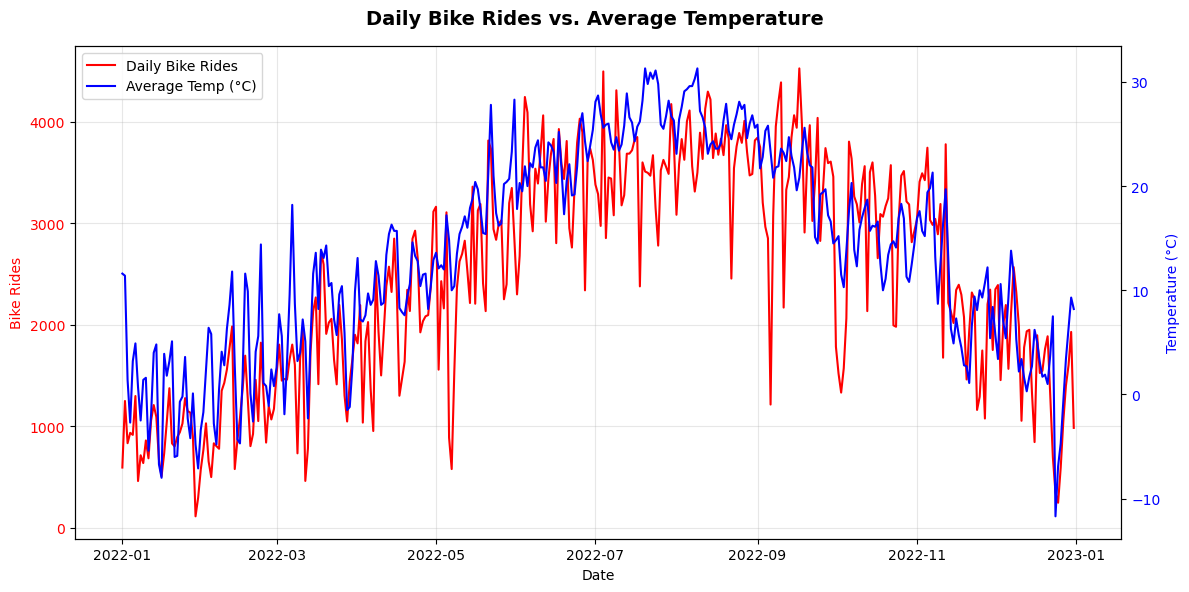

In [17]:
# Creating figure and axis objects
fig, ax = plt.subplots(figsize=(12, 6))

# Plotting bike rides on the first y-axis
ax.plot(df_temp['bike_rides_daily'], color="red", label="Daily Bike Rides")
ax.set_xlabel("Date")
ax.set_ylabel("Bike Rides", color="red")
ax.tick_params(axis="y", labelcolor="red")

# Creating second y-axis for temperatures
ax2 = ax.twinx()
ax2.plot(df_temp["avgTemp"], color="blue", label="Average Temp (°C)")
ax2.set_ylabel("Temperature (°C)", color="blue")
ax2.tick_params(axis="y", labelcolor="blue")

# Adding title and grid
fig.suptitle("Daily Bike Rides vs. Average Temperature", fontsize=14, fontweight="bold")
ax.grid(alpha=0.3)

# Adding legends
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines + lines2, labels + labels2, loc="upper left")

plt.tight_layout()
plt.show()

### For this visualization I used to Object-Oriented paradigm and started by using the supplied syntax in the exercise's notebook and from their I edited a few columns and added things like a legend and some labels.